# Teaching Kids: Random Walk

Imagine you are standing at a point. You flip a coin. 
- If it lands heads (H), you take one step left.
- If it lands tails (T), you take one step right.

After you flip the coin _n_ times, how far will you be from your _original_ point?

This process is called **Random Walk**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def flip_coin():
    return random.sample([-1,1],1)[0]

In [3]:
def generate_walk(path_length):
    """
    Generate a random walk by flipping a coin 'path_length' times and 
    adding each flip value i.e. -1 OR 1 to the previous flip value.
    Return a list of running total.
    """
    walk = list()
    for x in range(path_length):
        walk.append(flip_coin() + walk[-1] if len(walk) > 0 else flip_coin())
        
    return walk

In [4]:
def plot_walk(walks):
    """
    Helper function to plot random walks in 'walks' (coin flips).
    Each walk is an array of running total of a coin flip and its
    length represent number of coin flips
    """
    plt.figure(figsize=(15,8))
    
    for walk in walks:
        plt.step(range(1, len(walk)+1), walk)
        
    plt.xlabel("# of coin flips")
    plt.ylabel("Sum of coin flips")
    plt.grid(True)
    plt.show()
    #return plt

### Path length of random walk i.e. number of coin flips

In [5]:
path_length = 100

### Generate one random walk and plot it

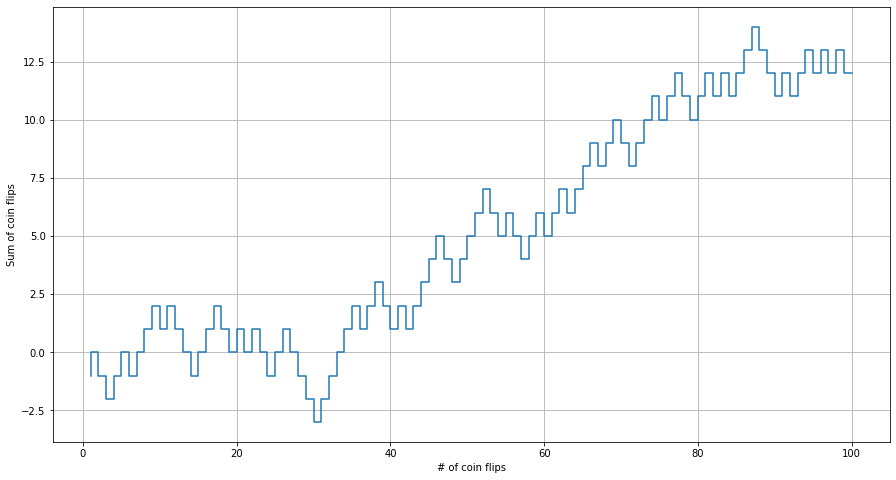

In [6]:
plot_walk([generate_walk(path_length)])

### Now generate 5 random walks and plot them

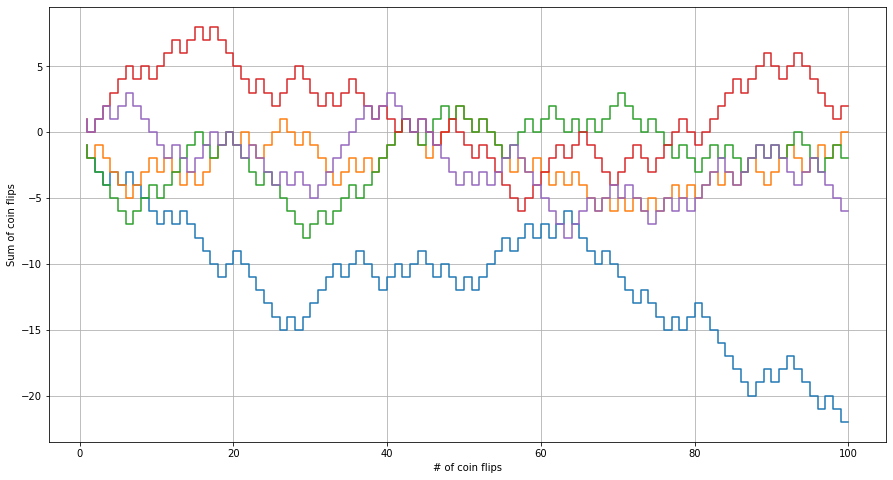

In [7]:
plot_walk([generate_walk(path_length) for _ in range(5)])

### Let's do 100 random walks
The plot below is crowded but there are some interesting features we can start observing. We are beginning to see edge cases - these are the walks, which have the max and min cumulative sums

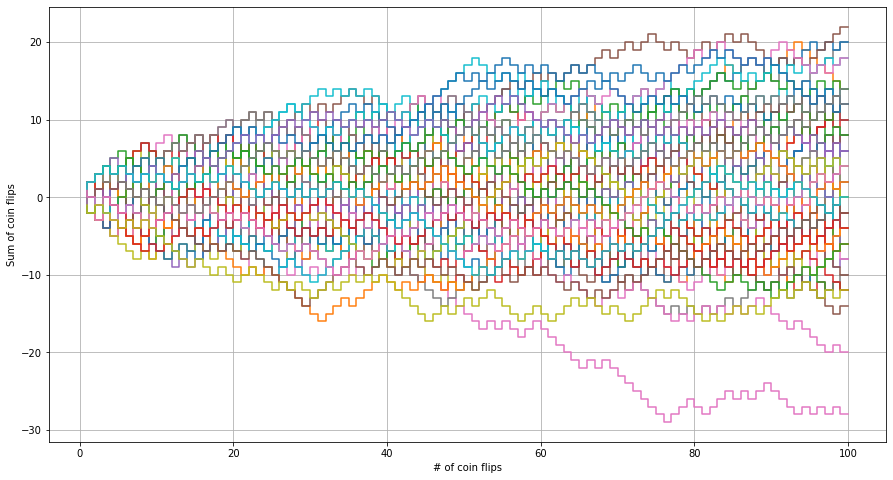

In [48]:
plot_walk([generate_walk(path_length) for _ in range(100)])

## Let's simulate 10K random walks 
This will give us a good sense of distribution and allow us to _filter down_ to the most 'interesting' ones

In [ ]:
simulate_walks = [generate_walk(path_length) for _ in range(10000)]

#### Generate interesting stats before we filter down

In [47]:
cumulative_sums = [walk[-1] for walk in simulate_walks]
print('Max sum: {0}'.format(max(cumulative_sums)))
print('Min sum: {0}'.format(min(cumulative_sums)))
print('Average: {0}'.format(sum(cumulative_sums)/len(cumulative_sums)))
print('5th Percentile: {0}'.format(np.percentile(cumulative_sums, 5)))
print('50th Percentile: {0}'.format(np.percentile(cumulative_sums, 50)))
print('95th Percentile: {0}'.format(np.percentile(cumulative_sums, 95)))

Max sum: 42
Min sum: -36
Average: 0.077
5th Percentile: -16.0
50th Percentile: 0.0
95th Percentile: 16.0


#### And generate the standard histogram to show distribution

(array([   3.,   18.,   38.,  106.,  232.,  517.,  848., 1307., 1533.,
        1570., 1431., 1051.,  686.,  377.,  171.,   68.,   29.,   10.,
           3.,    2.]),
 array([-36. , -32.1, -28.2, -24.3, -20.4, -16.5, -12.6,  -8.7,  -4.8,
         -0.9,   3. ,   6.9,  10.8,  14.7,  18.6,  22.5,  26.4,  30.3,
         34.2,  38.1,  42. ]),
 <a list of 20 Patch objects>)

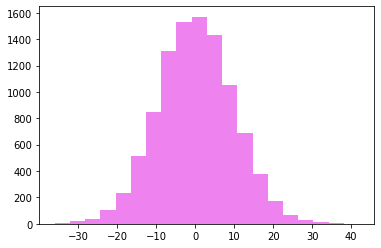

In [46]:
plt.hist(cumulative_sums, bins=20, color='violet')

### Demonstrate the most and least probable random walks
Filter down simulated random walks by picking the ones at 50th percentile (most occured), and at 5th and 95th percentiles

In [ ]:
5